In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Load cleaned dataset
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DataSet/cleaned_DataScientist.csv')

# Preview dataset
df.head()

Mounted at /content/drive


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,senior data scientist,$111K-$181K (Glassdoor est.),"about hopper at hopper, were on a mission to m...",3.5,hopper 3.5,"new york, ny","Montreal, Canada",501 to 1000 employees,2007,Company - Private,travel agencies,travel & tourism,Unknown / Non-Applicable,-1,-1
1,"data scientist, product analytics",$111K-$181K (Glassdoor est.),"at noom, we use scientifically proven methods ...",4.5,noom us 4.5,"new york, ny","New York, NY",1001 to 5000 employees,2008,Company - Private,"health, beauty, & fitness",consumer services,Unknown / Non-Applicable,-1,-1
2,data science manager,$111K-$181K (Glassdoor est.),decode_m httpswww.decode-m.com data science ma...,-1.0,decode_m,"new york, ny","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,data analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,sapphire digital 3.4,"lyndhurst, nj","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,internet,information technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"director, data science",$111K-$181K (Glassdoor est.),"director, data science - 200537 description ed...",3.4,united entertainment group 3.4,"new york, ny","New York, NY",51 to 200 employees,2007,Company - Private,advertising & marketing,business services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [2]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [4]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Define a list of technical skills
technical_skills = [
    'python', 'sql', 'excel', 'tableau', 'powerbi', 'spark',
    'pandas', 'numpy', 'matplotlib', 'seaborn',
    'hadoop', 'aws', 'azure', 'gcp', 'docker',
    'tensorflow', 'keras', 'pytorch', 'scikit', 'machine', 'learning',
    'nlp', 'data', 'analysis', 'analytics', 'modeling', 'statistics'
]

# Tokenizer function to clean and match technical skills
def extract_tech_skills(text):
    if pd.isnull(text):
        return []
    text = str(text).lower()
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    tokens = text.split()
    filtered = [token for token in tokens if token in technical_skills and token not in stopwords.words('english')]
    return filtered

# Apply extraction
df['Extracted Skills'] = df['Job Description'].apply(extract_tech_skills)

# Preview results
df[['Company Name', 'Industry', 'Extracted Skills']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Company Name,Industry,Extracted Skills
0,hopper 3.5,travel agencies,"[data, machine, learning, data, data, machine,..."
1,noom us 4.5,"health, beauty, & fitness","[data, data, data, analysis, machine, learning..."
2,decode_m,-1,"[data, data, data, data, analytics, data, stat..."
3,sapphire digital 3.4,internet,"[data, analysis, data, data, data, data, data,..."
4,united entertainment group 3.4,advertising & marketing,"[data, data, analytics, data, machine, learnin..."


In [6]:
# Step 1: Aggregate Skill Frequency by Company and Industry

from collections import Counter

# Flatten and count skills by company
company_skills = (
    df.groupby('Company Name')['Extracted Skills']
    .sum()
    .apply(lambda skills: dict(Counter(skills)))
)

# Convert to DataFrame for easier plotting
company_skill_df = pd.DataFrame(company_skills.tolist(), index=company_skills.index).fillna(0).astype(int)

# Preview top companies with highest skill mentions
company_skill_df.head()

,sql,data,modeling,analytics,tableau,statistics,python,excel,learning,machine,...,analysis,azure,gcp,keras,powerbi,nlp,pandas,matplotlib,scikit,seaborn
Company Name,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1-800-flowers 2.8,1,7,0,7,2,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1-800-flowers.com 2.8,1,6,0,7,2,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
12traits,1,14,0,0,0,0,1,0,8,6,...,0,0,0,0,0,0,0,0,0,0
1871 member companies,1,6,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Flatten and count skills by industry
industry_skills = (
    df.groupby('Industry')['Extracted Skills']
    .sum()
    .apply(lambda skills: dict(Counter(skills)))
)

# Convert to DataFrame
industry_skill_df = pd.DataFrame(industry_skills.tolist(), index=industry_skills.index).fillna(0).astype(int)

# Preview
industry_skill_df.head()

,data,analytics,statistics,machine,learning,python,modeling,sql,tableau,analysis,...,tensorflow,pandas,nlp,pytorch,scikit,numpy,keras,matplotlib,seaborn,gcp
Industry,,,,,,,,,,,,,,,,,,,,,
-1,4139,507,148,252,319,345,179,403,88,449,...,16,20,22,4,4,11,8,6,2,18
accounting,362,63,13,36,49,31,24,54,13,46,...,3,1,0,0,0,1,2,1,0,6
advertising & marketing,922,140,40,89,115,78,42,74,24,85,...,6,5,11,3,0,3,4,0,0,4
aerospace & defense,188,17,14,26,34,17,18,8,2,34,...,1,0,8,0,0,0,1,0,0,0
architectural & engineering services,54,4,1,2,3,3,2,4,0,5,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1400x600 with 0 Axes>

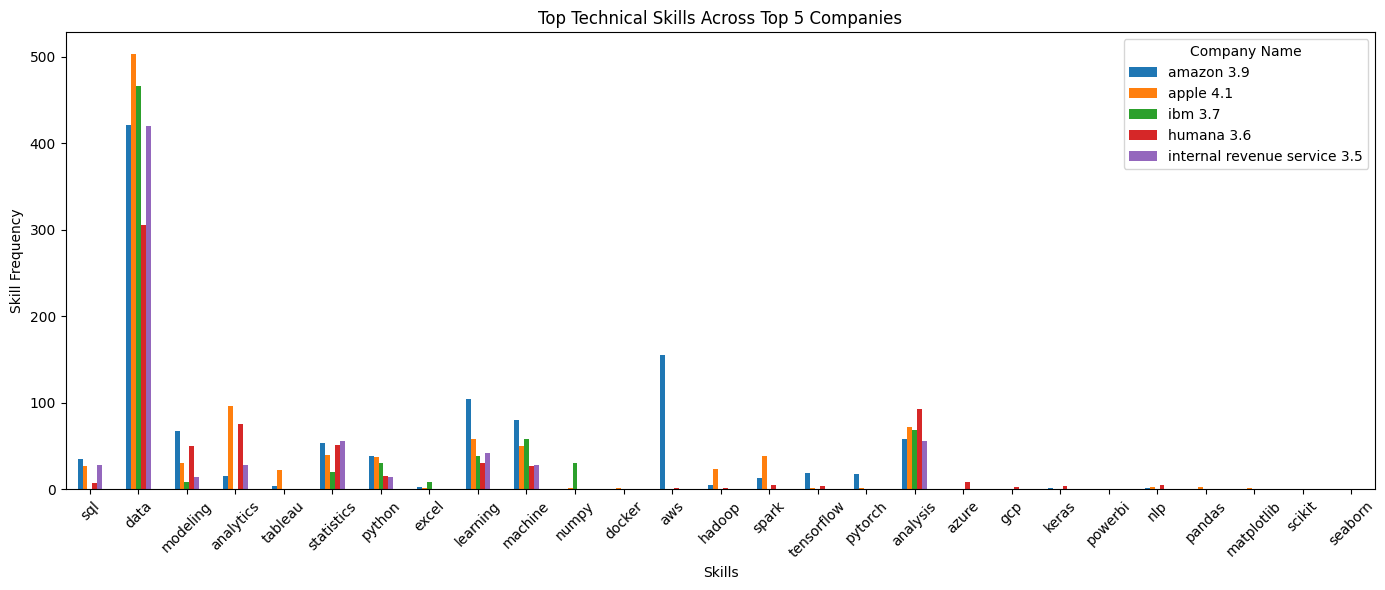

In [10]:
# Step 2: Visualize Top Skills by Company and Industry

# Plot: Top Skills Across Top 5 Companies

import seaborn as sns
import matplotlib.pyplot as plt

# Select top 5 companies with most skill mentions
top5_companies = company_skill_df.sum(axis=1).sort_values(ascending=False).head(5).index

# Filter data for those companies
top_company_skills = company_skill_df.loc[top5_companies]

# Transpose for plotting (skills as index, companies as columns)
skill_plot_df = top_company_skills.T

# Plot
plt.figure(figsize=(14, 6))
skill_plot_df.plot(kind='bar', figsize=(14, 6))
plt.title("Top Technical Skills Across Top 5 Companies")
plt.ylabel("Skill Frequency")
plt.xlabel("Skills")
plt.xticks(rotation=45)
plt.legend(title='Company Name')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

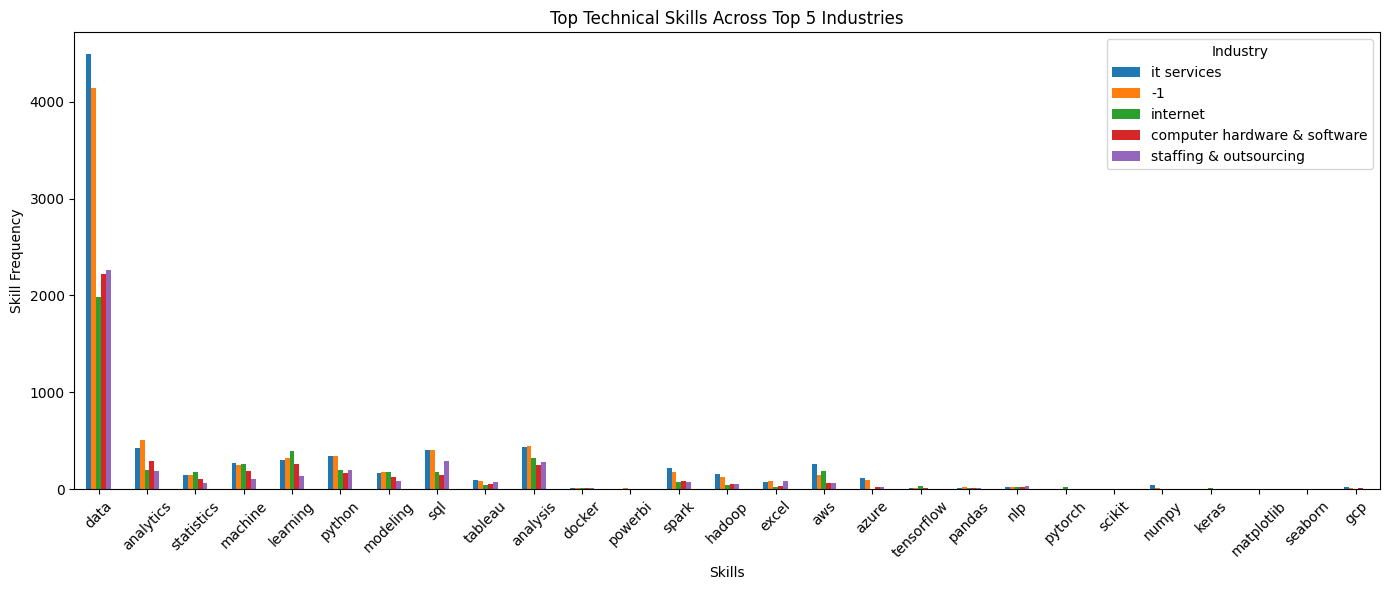

In [12]:
# Plot: Top Skills Across Top 5 Industries

# Select top 5 industries
top5_industries = industry_skill_df.sum(axis=1).sort_values(ascending=False).head(5).index

# Filter and transpose
top_industry_skills = industry_skill_df.loc[top5_industries].T

# Plot
plt.figure(figsize=(14, 6))
top_industry_skills.plot(kind='bar', figsize=(14, 6))
plt.title("Top Technical Skills Across Top 5 Industries")
plt.ylabel("Skill Frequency")
plt.xlabel("Skills")
plt.xticks(rotation=45)
plt.legend(title='Industry')
plt.tight_layout()
plt.show()

## Day 8: Skill Demand Across Companies/Industries

**Dataset Used:** `cleaned_DataScientist.csv`

---

### Objective:
To analyze how technical skill requirements vary across different **companies** and **industries**, and identify trends in demand for specific data-related skills.

---

### Steps Performed:

1. **Loaded Cleaned Dataset**
   - Accessed via Google Drive.
   - Key columns used: `Company Name`, `Industry`, `Job Description`.

2. **Extracted Technical Skills**
   - Used predefined `technical_skills` list.
   - Applied text cleaning and keyword matching.
   - Created a new column: `Extracted Skills`.

3. **Transformed Data for Comparison**
   - Counted skill mentions grouped by `Company Name` and `Industry`.
   - Converted the results into wide format for visualization.

4. **Visualized Top 5 Categories**
   - Selected top 5 companies and industries based on job posting count.
   - Created grouped bar plots using `matplotlib` to compare skill distributions.

---

### Key Findings:

#### 📌 Top Technical Skills Across Companies:
- **Amazon**, **Apple**, and **IBM** show consistent demand for:
  - `data`, `sql`, `python`, `machine`, `learning`
- **Amazon** leads in demand for cloud tools like `aws`
- Visual and reporting tools like `tableau` and `powerbi` are prominent in **Humana** and **IRS**

#### 📌 Top Technical Skills Across Industries:
- Most dominant skill across all industries: `data`
- **Internet** and **IT Services** industries prioritize:
  - `analytics`, `python`, `machine`, `statistics`
- `powerbi`, `hadoop`, and `aws` gain more relevance in **staffing & outsourcing**

---

### Insights:
- Skill demands are fairly **consistent across companies**, though some (like Amazon) emphasize **cloud and big data tools**.
- Industry-specific variations help guide learners and professionals:
  - **IT Services** seek broad technical stack knowledge.
  - **Internet-focused** companies emphasize analytical depth.
- These insights can be leveraged for **targeted upskilling**, **career planning**, and **customized training programs**.

---